In [2]:
import numpy as np
from causal_ccm.causal_ccm import ccm

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.load("../data/exp_pro/v1_anim5_tp6_actwvelp.npy", allow_pickle=True)

In [20]:
k = 10
top_k = np.argsort(data.mean(axis=1))[-k:]
act = np.vstack((data[top_k, :], data[-1, :]))  # add velP

In [23]:
def get_causality_corr(X, Y, tau, E):
    Xhat_My, Yhat_Mx = [], []  # correlation list
    for L in L_range:
        ccm_XY = ccm(X, Y, tau, E, L)  # define new ccm object # Testing for X -> Y
        ccm_YX = ccm(Y, X, tau, E, L)  # define new ccm object # Testing for Y -> X
        Xhat_My.append(ccm_XY.causality()[0])
        Yhat_Mx.append(ccm_YX.causality()[0])
    return Xhat_My, Yhat_Mx

In [43]:
L_range = range(100, data.shape[1], 250)  # L values to test
tau = 1
E = 3

X_Y, Y_X = [], []
for i in range(10):
    Xhat_My, Yhat_Mx = get_causality_corr(act[i, :], act[-1, :], tau, E)
    X_Y.append(Xhat_My)
    Y_X.append(Yhat_Mx)

Text(0.5, 1.0, 'Running predicts neural act.')

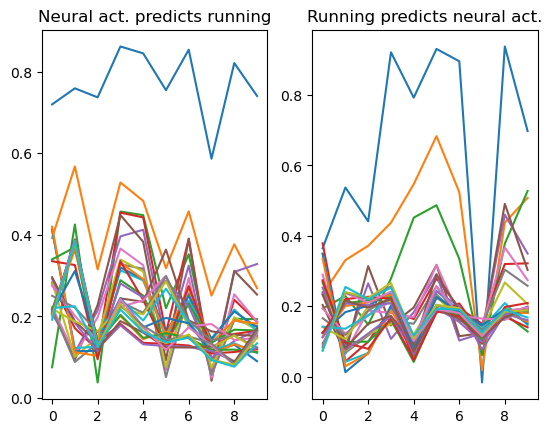

In [44]:
cx_y = np.stack(X_Y)
cy_x = np.stack(Y_X)
fig, axs = plt.subplots(1, 2)
axs[0].plot(cx_y)
axs[0].set_title("Neural act. predicts running")
axs[1].plot(cy_x)
axs[1].set_title("Running predicts neural act.")

In [ ]:
print("X->Y r", np.round(Xhat_My[-1], 2), "p value", np.round(ccm_XY.causality()[1], 4))
print("Y->X r", np.round(Yhat_Mx[-1], 2), "p value", np.round(ccm_YX.causality()[1], 4))

# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5, 5))
plt.plot(L_range, Xhat_My, label="$\hat{X}(t)|M_y$")
plt.plot(L_range, Yhat_Mx, label="$\hat{Y}(t)|M_x$")
plt.xlabel("L", size=12)
plt.ylabel("correl", size=12)
plt.legend(prop={"size": 12})